<h1 align='center'>Image Transformations using OpenCV</h1>
<h2 align='center'>May 15, 2017</h2>
<h3 align='center'>By Rajat V D</h3>

## Introduction
In this notebook, we will be exploring the various types of transformations which can be applied to images. We will use the OpenCV library to perform these transformations. The main goal of this notebook is for the reader to understand what exactly an image transformation is, and to gain a brief understanding of how to use them. To grasp the concepts behind these transformations, some basic mathematical background is required. This mainly includes a basic knowledge of matrices and matrix multiplication.

This notebook was made using OpenCV version 2.4.13. Please note that if a different version is installed, some parts of the notebook may not work correctly.

In [1]:
# Importing OpenCV and matplotlib
import cv2
%pylab inline

# Check the version you have installed
print "OpenCV version",cv2.__version__

Populating the interactive namespace from numpy and matplotlib
OpenCV version 2.4.13


In [2]:
# Matplotlib code to make the plots look bigger
rcParams['figure.figsize'] = 12, 9
rcParams['font.size'] = 20

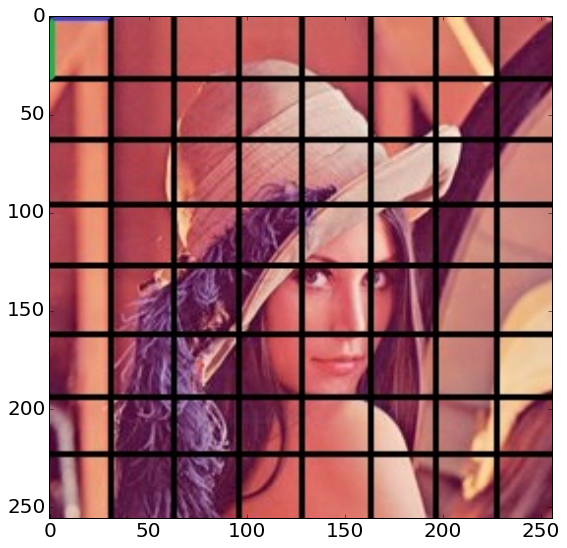

In [3]:
img = cv2.imread('sample1.jpg') # Read a sample image for testing
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads images as BGR, but matplotlib interprets them as RGB

imshow(img) # matplotlib function to display an image

We will use this image to test our transformations. Note that the image consists of black grid lines. These lines will help us visualise how the different transformations occur. Also notice the green and blue segments in the top corner. They will also be useful to us. 

## Affine transformations
Before we go into the details of what an affine transform is, let us first understand the concept of a linear transformation. A linear transformation $T$ is in general defined as a function which takes in the coordinates of a point on a plane, and returns another point, with some special properties. 

$$T: (x,y) \rightarrow (x',y')$$
or
$$T(x,y) = (x',y')$$

$T$ satisfies two special properties. The first one is:

$$T(cx,cy) = T(cx',cy')$$
where $c$ is some constant. And the second property is:

If $T(x,y) = (x',y')$ and $T(u,v) = (u',v')$, then
$$T(x+u,y+v) = (x'+u', y'+v')$$

Now, it can be shown that the application of any linear transformation to some point can be represented as multiplying the vector corresponding to that point by a particular sqaure matrix. We can then repesent the linear transformation as follows:

$$ \left[ {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right] \left[ {\begin{array}{c}
   x \\
   y \\
  \end{array} } \right] = \left[ {\begin{array}{c}
   x' \\
   y' \\
  \end{array} } \right]$$

Now, a special property of a linear transformation is that it always maps the zero vector to itself. This is where an affine transform differs from a linear transform. An affine transform is a linear transform, along with a shift of the origin. Using condensed matrix notation, and letting the linear transform matrix be called $A$, an affine transform maps the vector $x$ to $x'$ and is given by:

$$x' = Ax + b$$

where $b$ is the vector representing the shift of the origin. Using a bit of manipulation, we can write this as follows:

$$\left[ {\begin{array}{c}
   x'_1 \\
   x'_2 \\
  \end{array} } \right] = \left[ {\begin{array}{ccc}
   A_{11} & A_{12} & b_1\\
   A_{21} & A_{22} & b_2\\
  \end{array} } \right] \left[ {\begin{array}{c}
   x_1 \\
   x_2 \\
   1 \\
  \end{array} } \right]$$
  
The $2 \times 3$ matrix is called the affine matrix. When we want to perform an affine transform on an image, we need to provide OpenCV with this matrix. Let us see an example of this in action.

In [4]:
M = np.float32([[0.7, -0.5, 80],
              [-0.1, 1.2, 30]])
M # matrix which we are going to use

array([[  0.69999999,  -0.5       ,  80.        ],
       [ -0.1       ,   1.20000005,  30.        ]], dtype=float32)

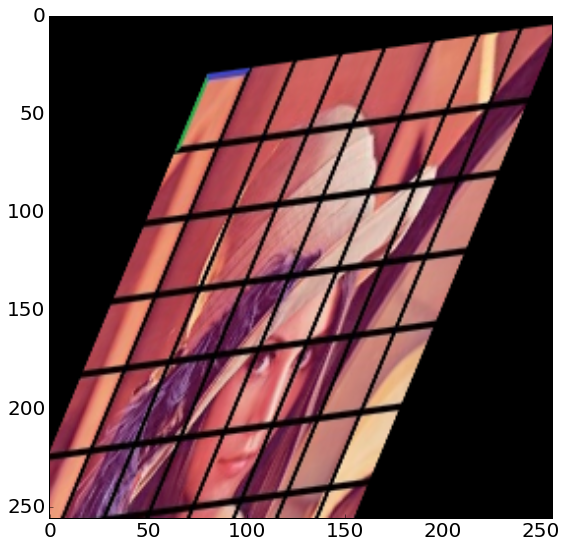

In [5]:
img2 = cv2.warpAffine(img,M,img.shape[:2]) # OpenCV function to apply an affine transform to an image.
# The first argument is the image to apply the transform to, the second is the affine matrix, and the third is the dimensions of
# the resulting image which you want to keep. OpenCV automatically fills in the gaps in the resulting image with black pixels.
imshow(img2)

The above result shows an example of a typical affine transform. Let us observe some key points. Firstly, we notice that the black grid lines which originally formed a grid of squares, now intersect in a grid of parallelograms. Also, lines which were parallel before the transform remain parallel after the transform. This is a key characteristic of any linear transform. 

Now, observe the green and blue segments. In the original picture, they are perpendicular to each other and of equal length. In some length scale, we can call them unit vectors. Notice that after the transform, they are no longer perpendicular, and their lengths have changed. In fact, the new blue and green vectors are just the first and second columns of the matrix $A$, in the particular length scale. This nifty fact allows us to easily visualize an affine transform simply by looking at the affine matrix. One must also remember that the third column of the affine matrix is simply the position vector of the old origin after the transform.

### Rotations

The rotation of an image by some angle is actually another affine transform. OpenCV has a function to help us get the affine matrix of a rotation about some point by some angle. We demonstrate this below.

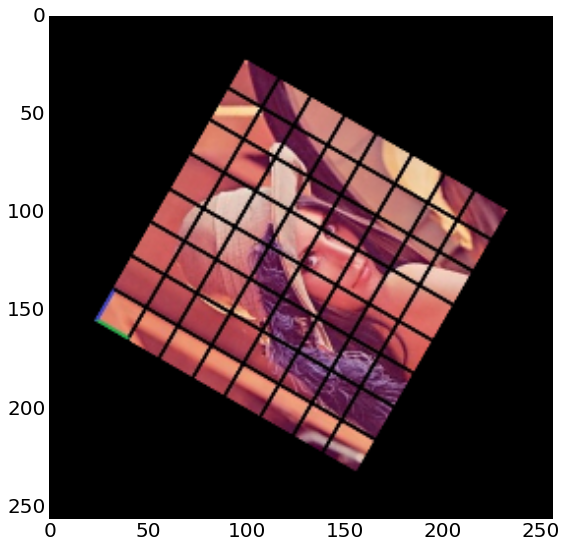

In [6]:
R = cv2.getRotationMatrix2D((127,127),60,0.6)
# The first argument is the centre of rotation, the second is the rotation angle in degrees and the third is a scaling factor.

rotated = cv2.warpAffine(img,R,img.shape[:2])
imshow(rotated)

In the above code block, we rotated the image about its centre by an angle of $60$ degrees and also shrunk the image by a factor of $0.6$. Notice again that the gaps in the resultant image is filled in by black pixels.
<hr>
Another interesting type of transform is to mirror the image about some line. I will leave the question of whether this transform is affine or not, and how to perform it if it is, as an exercise for the reader. (HINT: think about the blue and green unit vectors of the mirrored image)

## Perspective transforms
Another very useful type of image transformation is the perspective transform. An intuitive way to think about this transform is the following: change the camera position from which the original image was taken, and then take a new photo of the same three dimensional object to get the transformed image. This method will not always work because the change in perspective(moving the camera) might uncover previously occluded objects. So the perspective transform of 2D images should be thought of as camera movements which do not alter the occlusion of objects. 

Mathematically, perspective transforms are represented as $3 \times 3$ matrices. The details of the mathematics behind these transforms can get quite involved, so it will not be covered. The way to describe a perspective transform is to look at what happens to a set of 4 points out of which no three are collinear. If you can decide where any such 4 points will be mapped to, the perspective transform is determined. OpenCV has a handy function to get us the matrix associated with this transform from the maps of 4 points. This is shown below:

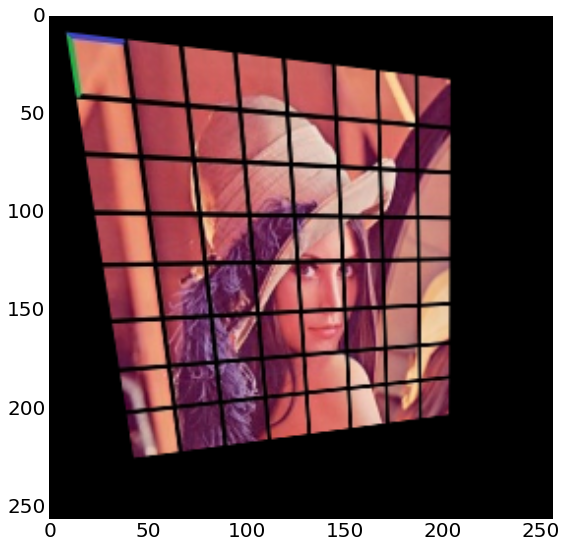

In [7]:
pts1 = np.float32([[10,10],[10,250],[250,10],[250,250]]) # 4 input points to the transform
pts2 = np.float32([[20,20],[50,220],[200,40],[200,200]]) # where the 4 points in pts1 are mapped to by the transform
M2 = cv2.getPerspectiveTransform(pts1,pts2)
img3 = cv2.warpPerspective(img,M2,img.shape[:2]) # apply the transform. Arguments similar to warpAffine.
imshow(img3)

Observe an important difference between the above image and an image resulting from an affine transform. The black lines which were originally parallel are now no longer parallel in the resulting image. Also, with a bit of imagination and visualization, one can see that the resulting image looks like a view of the original image from a slightly farther and shifted point. As with affine transforms, gaps in the resulting image are filled with black pixels.

### Example of using a perspective transform
Consider a second sample image shown below. It is a picture of a painting taken at a slight distance away from the painting, resulting in a lot of unwanted background. Let us use a perspective transform to pick out only the painting.

(448L, 303L, 3L)


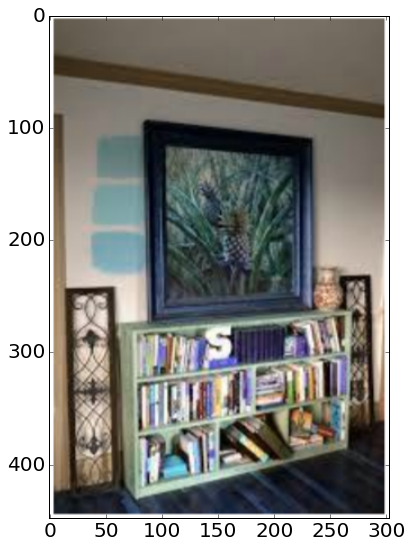

In [8]:
sample2 = cv2.imread('sample2.PNG')
imshow(sample2)
print sample2.shape

Notice that in the image, the painting is actually a trapezoid. This means that we can't just crop out the unecessary parts and be left with a picture of the painting. To get a result which is a square image, we need to use a perspective transform which maps the corners of the painting to the corners of a square. To find the corners of the painting, we will, for now, just open up the image in paint and look at the coordinates of the corners manually. There are algorithms to automatically find these corners, but we will not look into them in this notebook. Once we have found the corners of the painting, we can map them to the corners of square through a perspective transform. Then, we will get a resultant image with only the painting, as we wanted. This process is performed below:

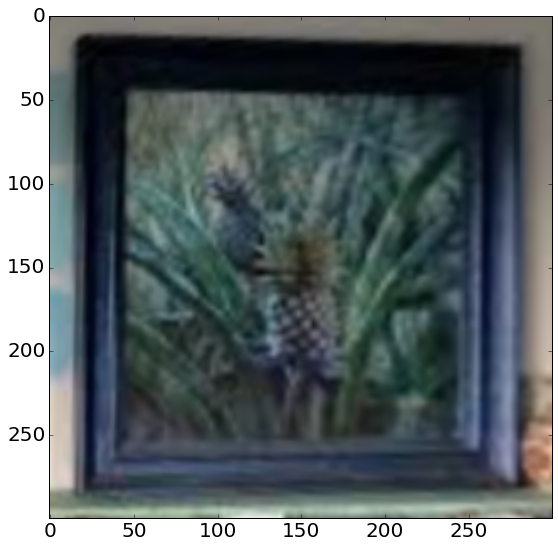

In [9]:
pts1 = np.float32([[73,84],[78,284],[243,100],[244,272]]) 
# Manually found corners of the painting. The corners are slightly away from the actual corners 
# so that the frame can be clearly visible.

pts2 = np.float32([[0,0],[0,300],[300,0],[300,300]])
# Corners of a square.


M3 = cv2.getPerspectiveTransform(pts1,pts2) # Get the perspective transform matrix
img4 = cv2.warpPerspective(sample2,M3,(300,300)) # Apply it
imshow(img4)

It is pretty clear that the above resulting image looks as if someone took the camera up close to the painting from the original image, and took a new photo. This is a really useful application of perspective transforms.